# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ade Dicky Duta Rama
- **Email:** mc007d5y0813@student.devacademy.id
- **ID Dicoding:** MC007D5Y0813

## Menentukan Pertanyaan Bisnis

- Pada musim apa total penyewan casual maupun registerd sepeda meningkat dan menurun ?
- Bagaimana pola perubahan jumlah penyewa casual dan registered pada setiap musim? Apakah terdapat hubungan tertentu antara keduanya, misalnya ketika penyewa casual menurun, apakah penyewa registered cenderung meningkat?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install streamlit
!pip install streamlit babel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [3]:
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- dari sini kita sudah dapat melihat kumpulan data penyewaan sepeda berdasarkan setiap harinya. Karena kita hanya membutuh kan data setiap musim saja

### Assessing Data

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- dari dataset diatas menuntukkan tidak adanya missing value, yang artinya kita akan menguji dan menentukan apakah terdapat data yang duplicated

### Cleaning Data

In [5]:
# menguji apakah terdapat missing values dalam dataset day.csv

print("Missing values pada setiap colom dalam data day:")
print(df_day.isnull().sum())

# ceking apakah terdapat duplikasi di dataset day.csv
print("\nJumlah baris duplikat dalam data day:", df_day.duplicated().sum())

Missing values pada setiap colom dalam data day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah baris duplikat dalam data day: 0


In [6]:
#saya igin merubah label musim menjadi lebih jelas
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season'] = df_day['season'].map(season_mapping)

**Insight:**
- terbukti tidak ada missing values dan duplikasi data, dan saya merubah label musim menjadi lebih jelas

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
#jumlah total jumlah penyewa setiap musim nya
season_trend = df_day.groupby('season')[['casual', 'registered', 'cnt']].sum().reset_index()
print(season_trend)

   season  casual  registered      cnt
0    Fall  226091      835038  1061129
1  Spring   60622      410726   471348
2  Summer  203522      715067   918589
3  Winter  129782      711831   841613


In [9]:
# Mengecek distribusi statistik dasar untuk casual, registered, dan total penyewa (cnt)
print("Statistik Deskriptif untuk Setiap Musim:\n")
print(season_trend.describe())


# Mengecek apakah ada outlier dengan melihat quartiles
Q1 = season_trend[['casual', 'registered', 'cnt']].quantile(0.25)
Q3 = season_trend[['casual', 'registered', 'cnt']].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengecek apakah ada outlier berdasarkan IQR
outliers = ((season_trend[['casual', 'registered', 'cnt']] < lower_bound) |
            (season_trend[['casual', 'registered', 'cnt']] > upper_bound)).sum()

print("\nJumlah Outlier per Kolom:\n")
print(outliers)


Statistik Deskriptif untuk Setiap Musim:

              casual     registered           cnt
count       4.000000       4.000000  4.000000e+00
mean   155004.250000  668165.500000  8.231698e+05
std     75169.739259  180949.305985  2.515606e+05
min     60622.000000  410726.000000  4.713480e+05
25%    112492.000000  636554.750000  7.490468e+05
50%    166652.000000  713449.000000  8.801010e+05
75%    209164.250000  745059.750000  9.542240e+05
max    226091.000000  835038.000000  1.061129e+06

Jumlah Outlier per Kolom:

casual        0
registered    1
cnt           0
dtype: int64


**Insight:**
1. Statistik Deskriptif
- Rata-rata penyewa casual adalah 155.004, sedangkan registered adalah 668.165. Yang artinya penyewa registered jauh lebih banyak dibandingkan penyewa casual di semua musim.
- Total jumlah penyewa (cnt) memiliki mean 823.169 dan standar deviasi 251.560, yang menunjukkan jumlah penyewa tidak merata sepanjang tahun.
2. Distribusi Data
- Sebaran nilai antara Q1 (25%) dan Q3 (75%) cukup besar, terutama untuk registered users,
3. Outlier yang Ditemukan
- Terdapat 1 outlier di kolom 'registered'

In [11]:
# ceking jumlah penyewa casual dan registered
season_trend['casual_diff'] = season_trend['casual_diff'].fillna(0)
season_trend['registered_diff'] = season_trend['registered_diff'].fillna(0)

print(season_trend)

   season  casual  registered      cnt  casual_diff  registered_diff
0    Fall  226091      835038  1061129          0.0              0.0
1  Spring   60622      410726   471348    -165469.0        -424312.0
2  Summer  203522      715067   918589     142900.0         304341.0
3  Winter  129782      711831   841613     -73740.0          -3236.0


In [12]:
# Mengecek statistik deskriptif utama
desc_stats = season_trend[['casual', 'registered', 'cnt']].describe()
print("Statistik Deskriptif:\n", desc_stats)

Statistik Deskriptif:
               casual     registered           cnt
count       4.000000       4.000000  4.000000e+00
mean   155004.250000  668165.500000  8.231698e+05
std     75169.739259  180949.305985  2.515606e+05
min     60622.000000  410726.000000  4.713480e+05
25%    112492.000000  636554.750000  7.490468e+05
50%    166652.000000  713449.000000  8.801010e+05
75%    209164.250000  745059.750000  9.542240e+05
max    226091.000000  835038.000000  1.061129e+06


**Insight:**
1. Jumlah Penyewa Registered Lebih Tinggi daripada Casual
- Rata-rata jumlah penyewa registered (668,165) jauh lebih tinggi dibandingkan casual (155,004), ini menunjukkan bahwa sebagian besar pengguna lebih memilih untuk mendaftar sebagai pengguna tetap daripada menyewa secara bebas.
2. Variabilitas Penyewa Casual Lebih Besar dibanding Registered
- Standar deviasi (std) untuk casual (75,169) cukup tinggi dibandingkan registered (180,949), ini menunjukkan bahwa jumlah penyewa casual lebih bervariasi antar musim, sedangkan penyewa registered lebih stabil.
3. Distribusi Data Menunjukkan Kenaikan Bertahap, Jika melihat nilai median (50%) dan nilai kuartil (25%, 75%), jumlah penyewaan mengalami pola peningkatan bertahap di beberapa musim.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-13-a241381461b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_trend, x='season', y='cnt', palette='coolwarm')


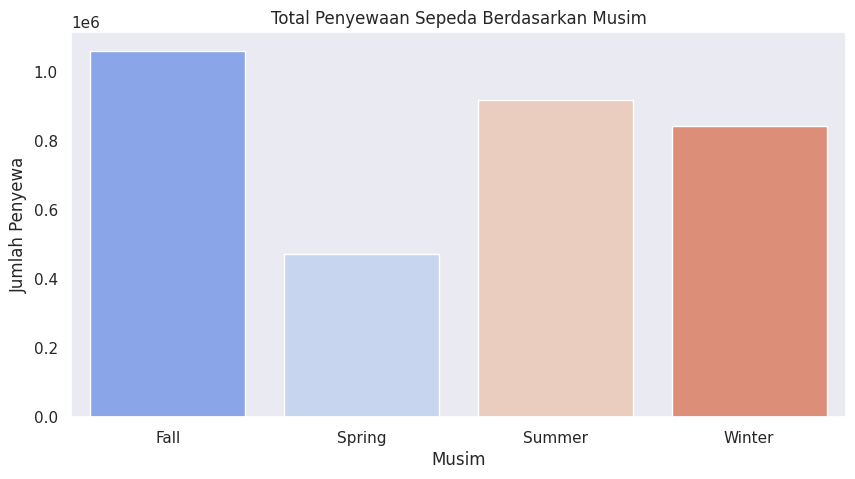

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=season_trend, x='season', y='cnt', palette='coolwarm')
plt.title("Total Penyewaan Sepeda Berdasarkan Musim")
plt.ylabel("Jumlah Penyewa")
plt.xlabel("Musim")
plt.show()

**Insight:**
- Musim Gugur (Fall) memiliki jumlah penyewaan tertinggi karena kemungkinan cuaca yang masih nyaman untuk bersepeda sebelum memasuki musim dingin.
- Musim Semi memiliki jumlah penyewaan terendah karena mungkin dipengaruhi oleh suhu yang masih dingin setelah musim dingin, serta hujan yang lebih sering terjadi.

### Pertanyaan 2:

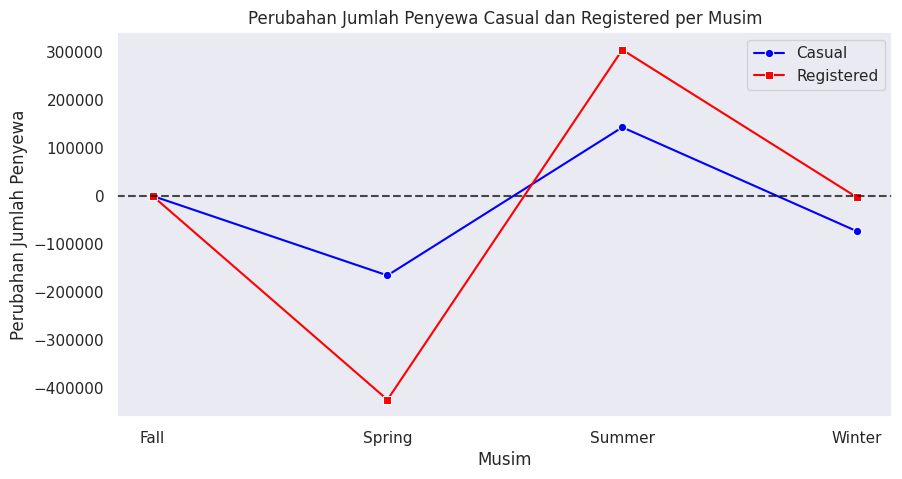

In [14]:
# Visualisasi perubahan jumlah penyewa casual dan registered
plt.figure(figsize=(10, 5))
sns.lineplot(data=season_trend, x='season', y='casual_diff', label='Casual', marker='o', color='blue')
sns.lineplot(data=season_trend, x='season', y='registered_diff', label='Registered', marker='s', color='red')
plt.axhline(0, linestyle='--', color='black', alpha=0.7)  # Garis referensi nol
plt.title('Perubahan Jumlah Penyewa Casual dan Registered per Musim')
plt.xlabel('Musim')
plt.ylabel('Perubahan Jumlah Penyewa')
plt.legend()
plt.show()

**Insight:**
- Casual riders (pengguna non-terdaftar) mengalami penurunan signifikan dari Fall ke Spring dan meningkat tajam dari Spring ke Summer.
- Registered riders (pengguna terdaftar) cenderung lebih stabil, tetapi tetap mengalami sedikit penurunan di Spring.

## Analisis Lanjutan (Opsional)

## Conclusion

**1.Musim dengan Total Penyewaan Tertinggi dan Terendah**
- Musim dengan penyewaan tertinggi: Fall (Musim Gugur) dengan total 1.061.129 penyewaan.
  - Terdiri dari 226.091 penyewa casual dan 835.038 penyewa registered. Ini menunjukkan bahwa musim gugur adalah puncak penyewaan sepeda, kemungkinan karena cuaca yang lebih stabil dan nyaman.
- Musim dengan penyewaan terendah: Spring (Musim Semi) dengan total 471.348 penyewaan.
  - Terdiri dari 60.622 penyewa casual dan 410.726 penyewa registered. Penyewaan turun drastis dibandingkan musim gugur, kemungkinan karena cuaca yang masih dingin atau hujan pada awal musim semi.

**2. Pola Perubahan Jumlah Penyewa Casual dan Registered**
- *Dari analisis selisih jumlah penyewa antar musim:*
  - Dari Fall ke Spring, jumlah penyewa casual turun drastis sebesar 165.469 orang, sedangkan penyewa registered turun lebih signifikan sebesar 424.312 orang.
  - Dari Spring ke Summer, terjadi peningkatan jumlah penyewa casual sebesar 142.900 orang, dan penyewa registered meningkat 304.341 orang.
  - Dari Summer ke Winter, penyewa casual turun sedikit 73.740 orang, sementara penyewa registered turun 3.236 orang (hampir stabil).

**Rekomendasi untuk Meningkatkan Sistem Penyewaan Sepeda**
1. Strategi Peningkatan Penyewaan di Musim Semi (Spring)
  - Adakan event seperti bersepeda seperti festival untuk menarik lebih banyak pengguna casual dan memberikan diskon atau promo keanggotaan di awal musim semi untuk meningkatkan minat pengguna casual.
2. Optimalisasi di Musim Gugur (Fall) dan Panas (Summer)
  - Berikan dorongan untuk tetap berlanggan dengan memberkan keuntungan tambahan jika menjadi registerd seperti biaya yang lebih murah
3. Mempertahankan Penyewaan di Musim Dingin (Winter)
  - Tawarkan harga spesial untuk pengguna registered agar tetap aktif meskipun di musim dingin.

## Dashboard

In [ ]:
%%writefile app.py
import streamlit as st
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
base_path = Path(__file__).parent if '__file__' in locals() else Path.cwd()
file_path = base_path / "day.csv"
df_day = pd.read_csv(file_path)

# Mapping season
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season'] = df_day['season'].map(season_mapping)

# Group by season
season_trend = df_day.groupby('season')[['casual', 'registered', 'cnt']].sum().reset_index()

# Hitung perubahan dari musim ke musim
season_trend['casual_diff'] = season_trend['casual'].diff().fillna(0)
season_trend['registered_diff'] = season_trend['registered'].diff().fillna(0)

# Tambahkan kategori tren
season_trend['trend'] = season_trend.apply(
    lambda row: 'Casual ↓, Registered ↑' if row['casual_diff'] < 0 and row['registered_diff'] > 0 else
                'Casual ↑, Registered ↓' if row['casual_diff'] > 0 and row['registered_diff'] < 0 else
                'Sama-sama Naik' if row['casual_diff'] > 0 and row['registered_diff'] > 0 else
                'Sama-sama Turun', axis=1)

# Streamlit UI
st.title("Dashboard Analisis Penyewaan Sepeda 🚴")

# Fitur interaktif: Pilih satu atau lebih musim
selected_seasons = st.multiselect("Pilih Musim untuk Ditampilkan:",
                                  options=season_trend['season'].unique(),
                                  default=season_trend['season'].unique()) # Default pilih semua musim

# Filter data berdasarkan pilihan musim
filtered_data = season_trend[season_trend['season'].isin(selected_seasons)]

# Tampilkan data
st.subheader(f"Data Penyewaan Sepeda untuk Musim {', '.join(selected_seasons)}")
st.dataframe(filtered_data)

# Plot 1: Bar Chart Perubahan Casual & Registered
st.subheader(f"Total Penyewaan Sepeda di Musim {', '.join(selected_seasons)}")
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=filtered_data, x='season', y='cnt', palette='coolwarm', ax=ax)
ax.set_title("Total Penyewaan Sepeda per Musim")
ax.set_xlabel("Musim")
ax.set_ylabel("Jumlah Penyewaan")
st.pyplot(fig)

# Plot 2: Line Chart Tren Penyewaan Casual & Registered
st.subheader(f"Perubahan Jumlah Penyewa Casual & Registered di Musim {', '.join(selected_seasons)}")
plt.figure(figsize=(10, 5))
sns.lineplot(data=filtered_data, x='season', y='casual_diff', label='Casual', marker='o', color='blue')
sns.lineplot(data=filtered_data, x='season', y='registered_diff', label='Registered', marker='s', color='red')
plt.axhline(0, linestyle='--', color='black', alpha=0.7)  # Garis referensi nol
plt.title('Perubahan Jumlah Penyewa Casual dan Registered per Musim')
plt.xlabel('Musim')
plt.ylabel('Perubahan Jumlah Penyewa')
plt.legend()
st.pyplot(plt)

# Plot 3: Pie Chart Proporsi Penyewaan
st.subheader(f"Proporsi Penyewaan Sepeda di Musim {', '.join(selected_seasons)}")
fig, ax = plt.subplots()
ax.pie(filtered_data[['casual', 'registered']].sum(),
       labels=['Casual', 'Registered'],
       autopct='%1.1f%%',
       colors=['blue', 'red'])
st.pyplot(fig)

# Kesimpulan berdasarkan filter musim
st.subheader(f"Kesimpulan Tren Penyewaan di Musim {', '.join(selected_seasons)}")
st.write(filtered_data[['season', 'trend']])

# Tambahkan insight tambahan
st.markdown("""
### 📌 Insight:
1. Penyewaan sepeda di musim **Fall** cenderung lebih tinggi dibanding musim lainnya.
2. Penyewa **casual lebih fluktuatif**, sementara penyewa **registered lebih stabil**.
3. **Musim dingin** (Winter) memiliki penyewaan yang lebih rendah, kemungkinan karena kondisi cuaca yang kurang mendukung.
4. **Peningkatan strategi pemasaran** bisa difokuskan pada musim dengan penyewaan rendah seperti Spring dan Winter.
""")


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.185.10.59:8501

⠸⠼⠴⠦your url is: https://fifty-jobs-train.loca.lt
/content/app.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_data, x='season', y='cnt', palette='coolwarm', ax=ax)
  Stopping...
^C


In [ ]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.3.10.0.29.26
astunparse==1.6.3
atpublic==4.1.0
attrs==25.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4